# Installing PyTorch (on Google Server)

Go to https://colab.research.google.com and sign in with your Google account. If you do not have a Google account you can create one. From there you can create a new notebook.

In [1]:
# http://pytorch.org/
from os.path import exists
from wheel.pep425tags import get_abbr_impl, get_impl_ver, get_abi_tag
platform = '{}{}-{}'.format(get_abbr_impl(), get_impl_ver(), get_abi_tag())
cuda_output = !ldconfig -p|grep cudart.so|sed -e 's/.*\.\([0-9]*\)\.\([0-9]*\)$/cu\1\2/'
accelerator = cuda_output[0] if exists('/dev/nvidia0') else 'cpu'

!pip install --no-cache-dir -I pillow
!pip install unidecode

!pip install -q http://download.pytorch.org/whl/{accelerator}/torch-0.4.1-{platform}-linux_x86_64.whl torchvision

    100% |████████████████████████████████| 2.0MB 54.5MB/s 
tcmalloc: large alloc 1073750016 bytes == 0x57684000 @  0x7f4c948e92a4 0x591a07 0x5b5d56 0x502e9a 0x506859 0x502209 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x507641 0x502209 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x507641 0x504c28 0x502540 0x502f3d 0x507641


In [2]:
!pip show torch

Name: torch
Version: 0.4.1
Summary: Tensors and Dynamic neural networks in Python with strong GPU acceleration
Home-page: UNKNOWN
Author: UNKNOWN
Author-email: UNKNOWN
License: UNKNOWN
Location: /usr/local/lib/python3.6/dist-packages
Requires: 
Required-by: torchvision


In [0]:
import torch

In [4]:
print(torch.__version__)

0.4.1


In [5]:
torch.cuda.is_available()

True

In [6]:
torch.version.cuda

'9.2.148'

In [7]:
# usual suspects
import os
import time
import shutil
import requests
import zipfile
from PIL import Image


import numpy as np
import pandas as pd
from cycler import cycler

# the good stuff
import torch
import torch.nn as nn
from torch.autograd import Variable
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
import torchvision
from torchvision import datasets, models, transforms

# standard sklearn import
from sklearn.metrics import accuracy_score

# minor changes to plotting functions
import matplotlib.pyplot as plt
cmap=plt.cm.tab10
c = cycler('color', cmap(np.linspace(0,1,10)))
plt.rcParams["axes.prop_cycle"] = c


%matplotlib inline

# change margin size of jupyter notebook
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))


In [8]:
t = torch.tensor([1,2,3])
t

tensor([1, 2, 3])

In [9]:
t = t.cuda()
t

tensor([1, 2, 3], device='cuda:0')

In [0]:
dd = [
    [1,2,3],
    [4,5,6],
    [7,8,9]
]

In [11]:
t = torch.tensor(dd)
t

tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])

In [12]:
type(t), t.shape


(torch.Tensor, torch.Size([3, 3]))

In [13]:
t.reshape(1,9)

tensor([[1, 2, 3, 4, 5, 6, 7, 8, 9]])

In [14]:
t.reshape(1,9).shape

torch.Size([1, 9])

In [15]:
print(t.dtype)
print(t.device)
print(t.layout)

torch.int64
cpu
torch.strided


In [16]:
device = torch.device('cuda:0')
device

device(type='cuda', index=0)

In [17]:
data = np.array([1,2,3])
torch.tensor(data)

tensor([1, 2, 3])

In [18]:
torch.as_tensor(data)

tensor([1, 2, 3])

In [19]:
torch.from_numpy(data)

tensor([1, 2, 3])

In [0]:
data = np.array([1,2,3])

In [0]:
t1 = torch.Tensor(data) #constructor
t2 = torch.tensor(data) #factory  have a new memory, go to function for use
t3 = torch.as_tensor(data) # sharing memory, first choice for sharing memory
t4 = torch.from_numpy(data)

In [22]:
print(t1.dtype)
print(t2.dtype)
print(t3.dtype)
print(t4.dtype)

torch.float32
torch.int64
torch.int64
torch.int64


In [23]:
torch.get_default_dtype()

torch.float32

In [24]:
torch.tensor(np.array([1,2,3]), dtype=torch.float64)

tensor([1., 2., 3.], dtype=torch.float64)

In [0]:
data[0] = 0
data[1] = 0
data[2] = 0

In [26]:
print(t1)
print(t2)
print(t3)
print(t4)

tensor([1., 2., 3.])
tensor([1, 2, 3])
tensor([0, 0, 0])
tensor([0, 0, 0])


tensor operation

In [0]:
t = torch.tensor([
    [1,1,1,1],
    [2,2,2,2],
    [3,3,3,3]
], dtype=torch.float32)

In [28]:
t.size(),t.shape, len(t.shape)

(torch.Size([3, 4]), torch.Size([3, 4]), 2)

In [29]:
t.numel(), torch.tensor(t.shape).prod()

(12, tensor(12))

In [30]:
t.reshape(1,12)

tensor([[1., 1., 1., 1., 2., 2., 2., 2., 3., 3., 3., 3.]])

In [31]:
t.reshape(3,4)

tensor([[1., 1., 1., 1.],
        [2., 2., 2., 2.],
        [3., 3., 3., 3.]])

In [32]:
t.reshape(2,6)

tensor([[1., 1., 1., 1., 2., 2.],
        [2., 2., 3., 3., 3., 3.]])

In [0]:
def flatten(t):
  t = t.reshape(1, -1)
  t = t.squeeze() #one d tensor 
  return t

In [34]:
flatten(t)

tensor([1., 1., 1., 1., 2., 2., 2., 2., 3., 3., 3., 3.])

In [35]:
t = t.reshape(-1)
t

tensor([1., 1., 1., 1., 2., 2., 2., 2., 3., 3., 3., 3.])

In [36]:
t1 = torch.tensor([
    [1,2],
    [3,4]
])

t2 = torch.tensor([
    [5,6],
    [7,8]
])

torch.cat((t1, t2), dim=0)

tensor([[1, 2],
        [3, 4],
        [5, 6],
        [7, 8]])

In [0]:
t1 = torch.tensor([
    [1,1,1,1],
    [1,1,1,1],
    [1,1,1,1],
    [1,1,1,1]
])

t2 = torch.tensor([
    [2,2,2,2],
    [2,2,2,2],
    [2,2,2,2],
    [2,2,2,2]
])

t3 = torch.tensor([
    [3,3,3,3],
    [3,3,3,3],
    [3,3,3,3],
    [3,3,3,3]
])

t4 = torch.tensor([
    [4,4,4,4],
    [4,4,4,4],
    [4,4,4,4],
    [4,4,4,4]
])

In [38]:
t = torch.stack((t1, t2, t3))
t.shape
#3 is the batch, 4 & 4 are height and width

torch.Size([3, 4, 4])

In [39]:
t

tensor([[[1, 1, 1, 1],
         [1, 1, 1, 1],
         [1, 1, 1, 1],
         [1, 1, 1, 1]],

        [[2, 2, 2, 2],
         [2, 2, 2, 2],
         [2, 2, 2, 2],
         [2, 2, 2, 2]],

        [[3, 3, 3, 3],
         [3, 3, 3, 3],
         [3, 3, 3, 3],
         [3, 3, 3, 3]]])

In [40]:
t = t.reshape(3, 1, 4, 4)
t

tensor([[[[1, 1, 1, 1],
          [1, 1, 1, 1],
          [1, 1, 1, 1],
          [1, 1, 1, 1]]],


        [[[2, 2, 2, 2],
          [2, 2, 2, 2],
          [2, 2, 2, 2],
          [2, 2, 2, 2]]],


        [[[3, 3, 3, 3],
          [3, 3, 3, 3],
          [3, 3, 3, 3],
          [3, 3, 3, 3]]]])

In [41]:
t.reshape(1,-1)[0]

tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

In [42]:
t.reshape(-1)

tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

In [43]:
t.flatten(start_dim=1).shape

torch.Size([3, 16])

In [44]:
t.flatten(start_dim=1)

tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
        [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]])

In [45]:
t.reshape(3, -1)

tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
        [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]])

 Element-wise Operations

In [0]:
t1 = torch.tensor([
    [1,2],
    [3,4]
], dtype=torch.float32)

t2 = torch.tensor([
    [5,6],
    [7,8]
], dtype=torch.float32)

In [47]:
t1 + t2

tensor([[ 6.,  8.],
        [10., 12.]])

In [48]:
t1 + 1 #Broadcasting

tensor([[2., 3.],
        [4., 5.]])

In [0]:
t1 = torch.tensor([
    [1,1],
    [1,1]
], dtype=torch.float32)

t2 = torch.tensor([2,4], dtype=torch.float32)

In [50]:
t1.shape, t2.shape

(torch.Size([2, 2]), torch.Size([2]))

In [51]:
t1 + t2

tensor([[3., 5.],
        [3., 5.]])

In [52]:
np.broadcast_to(t2.numpy(), t1.shape)

array([[2., 4.],
       [2., 4.]], dtype=float32)

In [0]:
t = torch.tensor([
    [0,1,0],
    [2,0,2],
    [0,3,0]
],dtype=torch.float32)

In [54]:
t.sum()

tensor(8.)

In [55]:
t.numel()

9

In [56]:
t.sum().numel()

1

In [57]:
t.mean()

tensor(0.8889)

In [0]:
t = torch.tensor([
    [1,1,1,1],
    [2,2,2,2],
    [3,3,3,3]
],dtype=torch.float32)

In [59]:
t.sum(), t.sum(dim=0), t.sum(dim=1)

(tensor(24.), tensor([6., 6., 6., 6.]), tensor([ 4.,  8., 12.]))

In [0]:
t = torch.tensor([
    [1,0,1,1],
    [4,2,1,0],
    [3,4,3,5]
],dtype=torch.float32)

In [61]:
t.max(), t.argmax(), t.flatten()

(tensor(5.),
 tensor(11),
 tensor([1., 0., 1., 1., 4., 2., 1., 0., 3., 4., 3., 5.]))

In [62]:
t.max(dim=0)

(tensor([4., 4., 3., 5.]), tensor([1, 2, 2, 2]))

In [63]:
t.max(dim=1)

(tensor([1., 4., 5.]), tensor([0, 0, 3]))

In [64]:
t.argmax(dim=0), t.argmax(dim=1)

(tensor([1, 2, 2, 2]), tensor([0, 0, 3]))

In [65]:
t.mean().item()

2.0833332538604736

In [66]:
t.mean(dim=1).tolist()

[0.75, 1.75, 3.75]

ETL for Pytorch using Fashion MNIST: data loader

In [0]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

import torchvision
import torchvision.transforms as transforms

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix
#from plotcm import plot_confusion_matrix

import pdb

torch.set_printoptions(linewidth=120)

In [69]:
train_set = torchvision.datasets.FashionMNIST(
        root='./data/FashionMNIST',
        train=True,
        download=True,
        transform=transforms.Compose([
            transforms.ToTensor()
        ])
)

Processing...
Done!


In [0]:
train_loader = torch.utils.data.DataLoader(train_set, batch_size=10)

In [71]:
train_set.train_labels.bincount()

tensor([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000])

In [72]:
train_set.train_labels

tensor([9, 0, 0,  ..., 3, 0, 5])

In [0]:
sample = next(iter(train_set))
image, label = sample

In [74]:
image.shape

torch.Size([1, 28, 28])

In [75]:
label

tensor(9)

label: tensor(9)


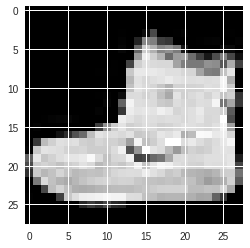

In [76]:
plt.imshow(image.squeeze(), cmap='gray')
print('label:', label)

In [0]:
batch = next(iter(train_loader))
images, labels = batch

In [78]:
images.shape, labels.shape, type(batch)

(torch.Size([10, 1, 28, 28]), torch.Size([10]), list)

labels: tensor([9, 0, 0, 3, 0, 2, 7, 2, 5, 5])


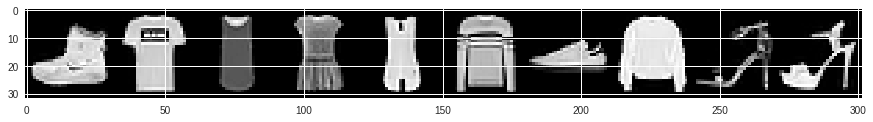

In [79]:
grid = torchvision.utils.make_grid(images, nrow=10)

plt.figure(figsize=(15,15))
plt.imshow(np.transpose(grid, (1,2,0)))

print('labels:', labels)

labels: tensor([9, 0, 0, 3, 0, 2, 7, 2, 5, 5, 0, 9, 5, 5, 7, 9, 1, 0, 6, 4, 3, 1, 4, 8, 4, 3, 0, 2, 4, 4, 5, 3, 6, 6, 0, 8, 5,
        2, 1, 6, 6, 7, 9, 5, 9, 2, 7, 3, 0, 3, 3, 3, 7, 2, 2, 6, 6, 8, 3, 3, 5, 0, 5, 5, 0, 2, 0, 0, 4, 1, 3, 1, 6, 3,
        1, 4, 4, 6, 1, 9, 1, 3, 5, 7, 9, 7, 1, 7, 9, 9, 9, 3, 2, 9, 3, 6, 4, 1, 1, 8])


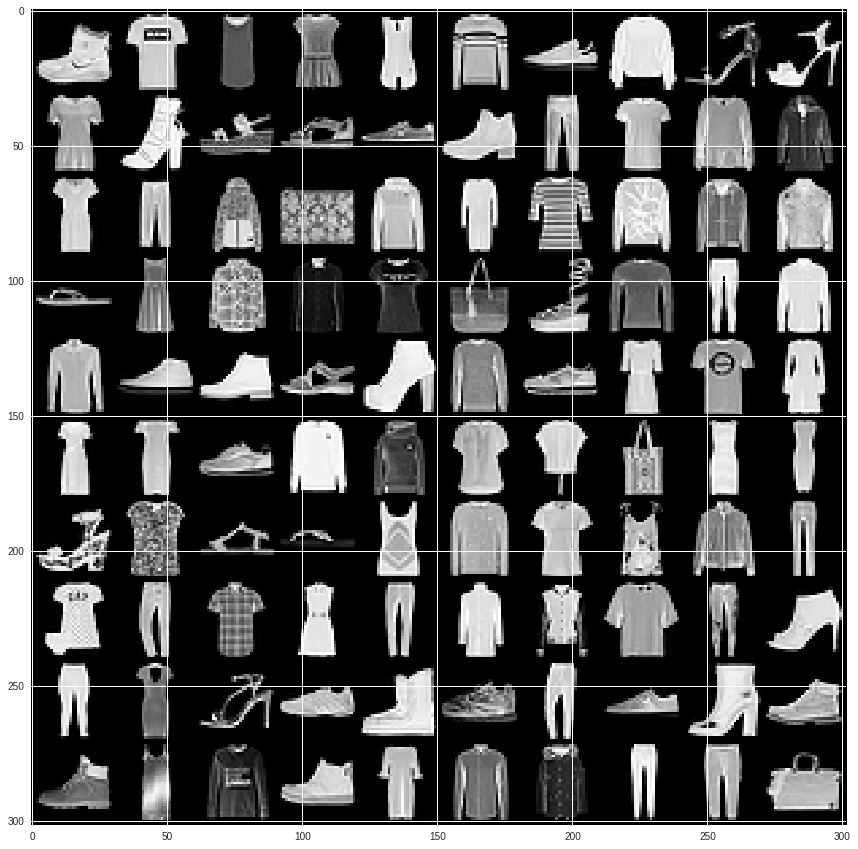

In [80]:
train_loader = torch.utils.data.DataLoader(train_set, batch_size=100)

batch = next(iter(train_loader))
images, labels = batch

grid = torchvision.utils.make_grid(images, nrow=10)

plt.figure(figsize=(15,15))
plt.imshow(np.transpose(grid, (1,2,0)))

print('labels:', labels)

build neural networks

In [0]:
class Network:
  def __init__(self):
    self.layer = None
    
  def forward(self, t):
    t = self.layer(t)
    return t

In [0]:
import torch.nn as nn

In [0]:
class Network(nn.Module):
  def __init__(self):
    super(Network, self).__init__() #inherit from nn.module
    self.conv1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5) #
    self.conv2 = nn.Conv2d(in_channels=6, out_channels=12, kernel_size=5)
    
    self.fc1 = nn.Linear(in_features=12*4*4, out_features=120)
    self.fc2 = nn.Linear(in_features=120, out_features=60)
    self.out = nn.Linear(in_features=60, out_features=10)
   
  def forward(self, t):
    #t = self.layer(t)
    
    return t

In [0]:
network = Network()

In [92]:
print(network)

Network(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 12, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=192, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=60, bias=True)
  (out): Linear(in_features=60, out_features=10, bias=True)
)


In [96]:
network.conv1.weight.shape

torch.Size([6, 1, 5, 5])

In [97]:
network.conv2.weight.shape

torch.Size([12, 6, 5, 5])

In [98]:
network.conv1.stride

(1, 1)

In [99]:
for param in network.parameters():
  print(param.shape)

torch.Size([6, 1, 5, 5])
torch.Size([6])
torch.Size([12, 6, 5, 5])
torch.Size([12])
torch.Size([120, 192])
torch.Size([120])
torch.Size([60, 120])
torch.Size([60])
torch.Size([10, 60])
torch.Size([10])


In [100]:
for name, param in network.named_parameters():
  print(name, '\t\t', param.shape)

conv1.weight 		 torch.Size([6, 1, 5, 5])
conv1.bias 		 torch.Size([6])
conv2.weight 		 torch.Size([12, 6, 5, 5])
conv2.bias 		 torch.Size([12])
fc1.weight 		 torch.Size([120, 192])
fc1.bias 		 torch.Size([120])
fc2.weight 		 torch.Size([60, 120])
fc2.bias 		 torch.Size([60])
out.weight 		 torch.Size([10, 60])
out.bias 		 torch.Size([10])
